In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [10]:
df = pd.read_csv('3.01. Country clusters.csv')
df

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


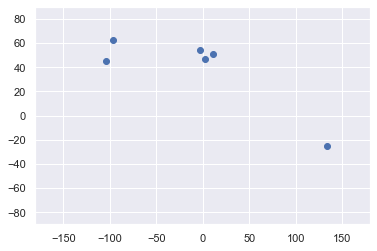

In [11]:
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

*DataFram.iloc(row indices, column indices)* slices te data frame, given rows and columns to be kept

Lets get latitude and longitude values into a dataframe since we are going to form cluster using the geographic location.

In [13]:
x = df.iloc[:,1:3] #Since I want all rows so using ':', for columns I want only latitude and longitude so '1:3'
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [12]:
#Lets create with 2 clusters of KMeans
kmeans = KMeans(2)

In [14]:
kmeans.fit(x) #This will apply k-means clustering with 2 clusters to x

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

*sklearn.cluster.KMeans.fit_predict(x)* returns the cluster predictions in an array.

In [15]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [16]:
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


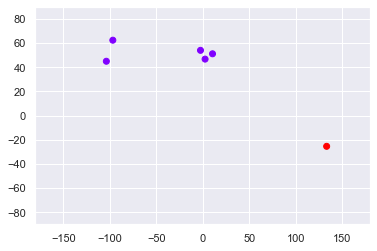

In [19]:
#Lets plot the above:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], 
            c=data_with_clusters['Cluster'], cmap='rainbow') #setting the color to different cluster by above
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

The above plot shows the K-Means clustering for 2 clusters :
1. USA, Canada, France, UK, Germany
2. Australia

Now lets try clustering with k as 3

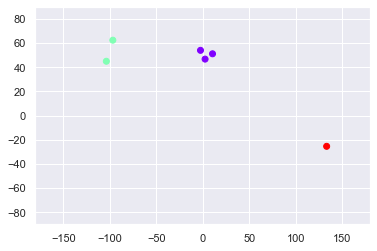

In [22]:
kmeans = KMeans(3)
kmeans.fit(x)

identified_clusters = kmeans.fit_predict(x)
data_with_clusters = df.copy()
data_with_clusters['Cluster'] = identified_clusters

plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.show()

The above plot shows the K-Means clustering for 3 clusters :
1. USA, Canada
2. France, UK, Germany
3. Australia